<a href="https://colab.research.google.com/github/Sujit-Ragav/Railway-human-detection-using-Yolov8/blob/main/people_counter_in_railways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Sep 12 10:18:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.175 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm" -O mall.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-09-12 05:45:50--  https://docs.google.com/uc?export=download&confirm=&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0cst7agqq52lsvqkkldvfapvhs4u4mn3/1694497500000/04309230031174164349/*/1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm?e=download&uuid=a64918e3-1dac-4e2d-b6ae-5b110cbf1683 [following]
--2023-09-12 05:45:53--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0cst7agqq52lsvqkkldvfapvhs4u4mn3/1694497500000/04309230031174164349/*/1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm?e=download&uuid=a64918e3-1dac-4e2d-b6ae-5b110cbf1683
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 74.125.1

In [ ]:
MALL_VIDEO_PATH = f"{HOME}/mall.mp4"

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz" -O subway.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-09-12 10:19:07--  https://docs.google.com/uc?export=download&confirm=t&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz
Resolving docs.google.com (docs.google.com)... 74.125.70.138, 74.125.70.102, 74.125.70.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.70.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/951nvff1tl4auev194lh66ah51n9gdoh/1694513925000/04309230031174164349/*/1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz?e=download&uuid=2790f9e3-4787-4ab5-b241-5e3cfd3ea2ae [following]
--2023-09-12 10:19:07--  https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/951nvff1tl4auev194lh66ah51n9gdoh/1694513925000/04309230031174164349/*/1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz?e=download&uuid=2790f9e3-4787-4ab5-b241-5e3cfd3ea2ae
Resolving doc-00-ag-docs.googleusercontent.com (doc-00-ag-docs.googleusercontent.com)... 142.251.161

In [ ]:
SUBWAY_VIDEO_PATH = f"{HOME}/subway.mp4"

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 152MB/s]



0: 1280x736 12 persons, 1 dog, 1 backpack, 3 handbags, 1 teddy bear, 42.3ms
Speed: 13.7ms preprocess, 42.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 736)


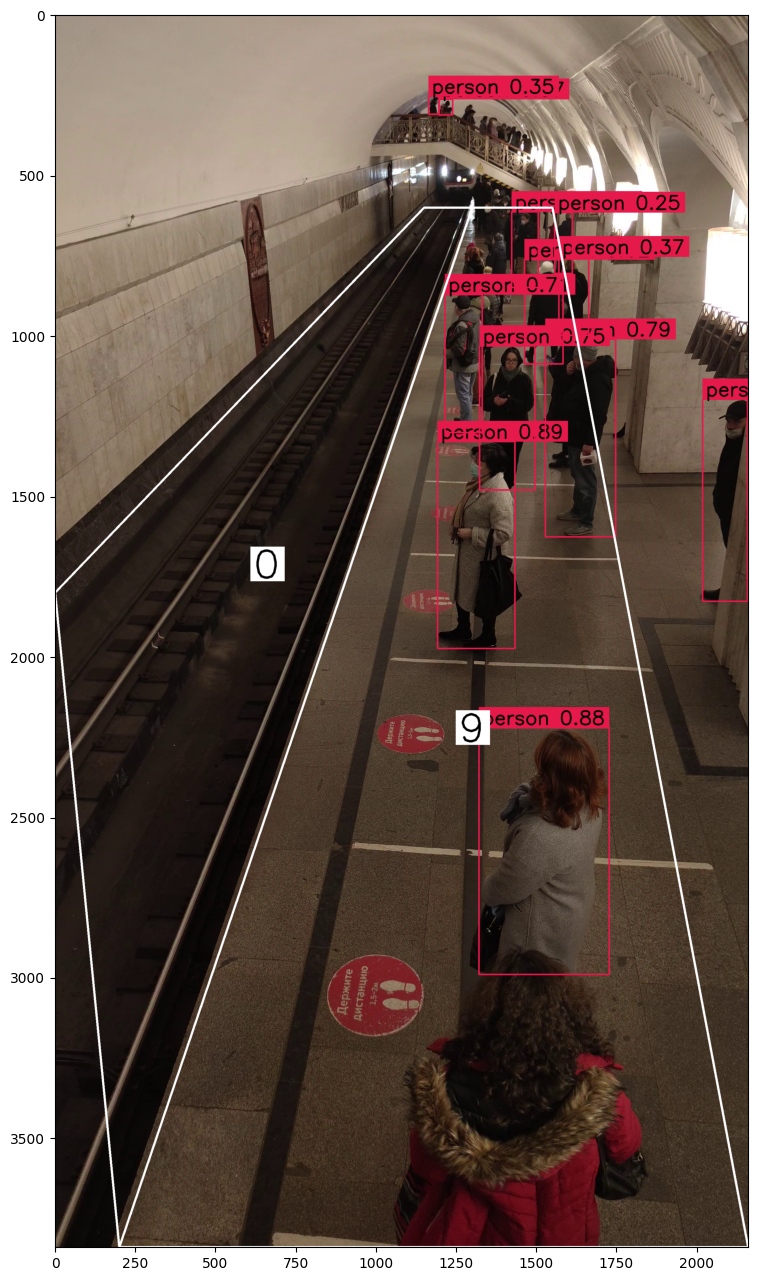

In [ ]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [200, 3840],
    [1300, 600],
    [1550, 600],
    [2160 , 3840]
])
tpolygon = np.array([
    [0,1800],
    [1150, 600],
    [1300, 600],
    [200 , 3840]
])
video_info = sv.VideoInfo.from_video_path(SUBWAY_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)
tzone = sv.PolygonZone(polygon=tpolygon, frame_resolution_wh=video_info.resolution_wh)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)
tzone_annotator = sv.PolygonZoneAnnotator(zone=tzone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)
# extract video frame
generator = sv.get_video_frames_generator(SUBWAY_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)
tzone.trigger(detections=detections)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)
frame = tzone_annotator.annotate(scene=frame)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

In [ ]:
import numpy as np
import supervision as sv

# # initiate polygon zone
polygon = np.array([
    [200, 3840],
    [1300, 600],
    [1550, 600],
    [2160 , 3840]
])
tpolygon = np.array([
    [0,1800],
    [1150, 600],
    [1300, 600],
    [200 , 3840]
])
video_info = sv.VideoInfo.from_video_path(SUBWAY_VIDEO_PATH)
print(video_info)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)
tzone = sv.PolygonZone(polygon=tpolygon, frame_resolution_wh=video_info.resolution_wh)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)
tzone_annotator = sv.PolygonZoneAnnotator(zone=tzone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)

def process_frame(frame: np.ndarray, _) -> np.ndarray:
    # detect
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_yolov8(results)
    detections = detections[detections.class_id == 0]
    zone.trigger(detections=detections)
    tzone.trigger(detections=detections)

    # annotate
    box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
    frame = zone_annotator.annotate(scene=frame)
    frame = tzone_annotator.annotate(scene=frame)
    return frame

sv.process_video(source_path=SUBWAY_VIDEO_PATH, target_path=f"{HOME}/SUBWAY_VIDEO.mp4", callback=process_frame)

# from IPython import display
# display.clear_output()

VideoInfo(width=2160, height=3840, fps=29, total_frames=1298)



0: 1280x736 12 persons, 1 dog, 1 backpack, 3 handbags, 1 teddy bear, 29.8ms
Speed: 8.6ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 736)

0: 1280x736 14 persons, 1 dog, 1 backpack, 3 handbags, 1 teddy bear, 29.8ms
Speed: 10.4ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 736)

0: 1280x736 14 persons, 1 backpack, 3 handbags, 1 teddy bear, 29.7ms
Speed: 11.0ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 736)

0: 1280x736 12 persons, 1 backpack, 3 handbags, 1 teddy bear, 29.9ms
Speed: 10.6ms preprocess, 29.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 736)

0: 1280x736 14 persons, 1 backpack, 3 handbags, 1 teddy bear, 29.9ms
Speed: 13.4ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 736)

0: 1280x736 14 persons, 1 train, 1 backpack, 4 handbags, 31.6ms
Speed: 10.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at sh

In [ ]:

!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/Sujit-Ragav/Railway-human-detection-using-Yolov8.git
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files
On branch main
nothing to commit, working tree clean
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address
